# Hands-On: FuseMedML and MultiModality

Welcome!

This notebook will guide you through the hands-on session.

Open and run this notebook in Google Colab (instructions can be found in 'Installation Details - Google Colab' section):

https://colab.research.google.com/github/IBM/fuse-med-ml/blob/master/fuse_examples/multimodality/image_clinical/multimodality_image_clinical.ipynb

## Session take-away
* Introduction to FuseMedML framework
* Introduction to multi-modality data and tasks
* Train multimodality based deep-learning model: demonstration of the integration of imaging and clinical data in skin lesion classification task


------------------
## FuseMedML
[![Github repo](https://img.shields.io/static/v1?label=GitHub&message=FuseMedML&color=brightgreen)](https://github.com/IBM/fuse-med-ml)

[![PyPI version](https://badge.fury.io/py/fuse-med-ml.svg)](https://badge.fury.io/py/fuse-med-ml)

[![Slack channel](https://img.shields.io/badge/support-slack-slack.svg?logo=slack)](https://join.slack.com/t/fusemedml/shared_invite/zt-xr1jaj29-h7IMsSc0Lq4qpVNxW97Phw)

[![Open Source](https://badges.frapsoft.com/os/v1/open-source.svg)](https://github.com/IBM/fuse-med-ml)


FuseMedML is an open-source python-based framework designed to enhance collaboration and accelerate discoveries in Fused Medical data through advanced Machine Learning technologies. 

Initial version is PyTorch-based and focuses on deep learning on medical imaging.


### **FuseMedML Key Concepts in a Nutshell**
### Share and Reuse

A common generic implementation, you can reuse, is provided for most components in the pipeline. 

The naming convention for the common implementation is `Fuse***Default` 

FuseMedML comes with a large collection of components that grow with each new project. Some of them are entirely generic and the others are domain specific.


Don't forget to **contribute** back and **share** them. 

### Decoupling
The decoupling is achieved by the fact that, in most cases, the objects do not interact directly. Instead, the information and data are routed between components using *namespaces* (examples below). 

Meaning, each object extracts its input from and saves its output into a dictionary named `batch_dict`. 

`batch_dict` aggregates the outputs of all the objects through a single batch. 

<br />

**Example of the decoupling approach:**
```python
MetricAUC(pred_name='model.output.classification', target_name='data.gt.classification')  
```

`MetricAUC` will read the required tensors to compute AUC from `batch_dict`. The relevant dictionary keys are `pred_name` and `target_name`. 

This approach allows writing a generic metric which is completely independent of the model and data extractor. 

In addition, it allows to easily re-use this object in a plug & play manner without adding extra code. 

Such an approach also allows us to use it several times in case we have multiple heads/tasks.

<br />


When a batch is completed, only the required key-value pairs from `batch_dict`, such as the loss values, will be collected in another dictionary named `epoch_results`. 

Both `batch_dict` and `epoch_results` are nested dictionaries. To easily access the data stored in those dictionaries, use `NDict`:

```python
batch_dict[‘model.output.classification’]
``` 

will return `batch_dict[‘model’][‘output’][‘classification’]`


### Use PyTorch directly and alternative frameworks

FuseMedML uses and extends PyTorch only when required by the user. 
You can mix FuseMedML with PyTorch code, components from alternative frameworks and other popular GitHub projects. 



---------
## Multimodality
Radiologists never diagnose based solely on a single modality. The decision is made by combining information from various sources. Therefore, it is important to include such information in machine learning algorithms. 

Radiologists take into account clinical information such as the reason the scan was ordered. If needed, they can also examine other clinical information from the electronic health records of the hospital.  

Prior images are another type of data that is routinely used in radiology reading. Radiologists will often compare a current study with imaging or other tests done in the past to assess change.

It is also a common practice to consider findings from several imaging modalities when making a diagnosis. Each reveals different aspects and attributes of the suspicious finding.

In this session, we will demonstrate two simple yet effective methods to integrate clinical data.
In all cases and in general, the clinical data should first be pre-processed, normalized, etc.

<img src="arch.png" alt="drawing" width="100%"/>

* **Imaging only implementation**

* **Imaging and Tabular data - concatenate tabular data after image feature extraction**

    The tabular data is integrated after feature extraction, done by a convolutional network followed by a pooling layer that extracts non-spatial features from the image.


* **Imaging and Tabular data - concatenate directly with the image**

    The tabular data is integrated at the beginning of the network by adding more channels to the input image. Each channel represents a single bit in the one-hot vector. 

    This method of integrating clinical features provides the network with the ability to extract better features using the backbone, in contrast to the standard way of integrating this data only after feature extraction.




-------------
## Task - ISIC 2019 challenge to classify dermoscopic images and clinical data among nine different diagnostic categories.

This task was chosen for demonstration since the data is simple and public, which will make the session more effective.

We explored the effectiveness of each method in two different tasks:
* Article: "Context in medical imaging: the case of focal liver lesion classification" - soon to be published
* FuseMedML example on [Duke dataset](https://sites.duke.edu/mazurowski/resources/breast-cancer-mri-dataset/) - will be published in FuseMedML repository.

Skin cancer is the most common cancer globally, with melanoma being the most deadly form. 

Dermoscopy is a skin imaging modality that has demonstrated improvement for the diagnosis of skin cancer compared to unaided visual inspection. 

<!-- However, clinicians should receive adequate training for those improvements to be realized.

In order to make expertise more widely available, the International Skin Imaging Collaboration (ISIC) has developed the ISIC Archive, 

an international repository of dermoscopic images, for both the purposes of clinical training, and for supporting technical research toward automated algorithmic analysis by hosting the ISIC Challenges.-->

The goal for ISIC 2019 is to classify dermoscopic images among eight different diagnostic categories:

* Melanoma
* Melanocytic nevus
* Basal cell carcinoma
* Actinic keratosis
* Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)
* Dermatofibroma
* Vascular lesion
* Squamous cell carcinoma
* None of the others

25,331 images are available for training across 8 different categories.

Two tasks were available for participation:
* classify dermoscopic images without meta-data,
* classify images with additional available meta-data, including age, gender and anatomic site

[1] Tschandl P., Rosendahl C. & Kittler H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data 5, 180161 doi.10.1038/sdata.2018.161 (2018)

[2] Noel C. F. Codella, David Gutman, M. Emre Celebi, Brian Helba, Michael A. Marchetti, Stephen W. Dusza, Aadi Kalloo, Konstantinos Liopyris, Nabin Mishra, Harald Kittler, Allan Halpern: “Skin Lesion Analysis Toward Melanoma Detection: A Challenge at the 2017 International Symposium on Biomedical Imaging (ISBI), Hosted by the International Skin Imaging Collaboration (ISIC)”, 2017; arXiv:1710.05006.

[3] Marc Combalia, Noel C. F. Codella, Veronica Rotemberg, Brian Helba, Veronica Vilaplana, Ofer Reiter, Allan C. Halpern, Susana Puig, Josep Malvehy: “BCN20000: Dermoscopic Lesions in the Wild”, 2019; arXiv:1908.02288.

------------
## Installation Details - Google Colab

### **Enable GPU Support**

To use GPU through Google Colab, change the runtime mode to GPU:

From the "Runtime" menu select "Change Runtime Type", choose "GPU" from the drop-down menu and click "SAVE"
When asked, reboot the system.

### **Install FuseMedML**

In [ ]:
!git clone https://github.com/IBM/fuse-med-ml.git
%cd fuse-med-ml
!pip install -e .

**Please reboot the session when asked!**

In [ ]:
import os

%cd fuse-med-ml/fuse_examples/multimodality/image_clinical
!export PYTHONPATH=$PYTHONPATH:$(pwd)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from fuse.utils.utils_logger import fuse_logger_start
import logging

fuse_logger_start(output_path=None, console_verbose_level=logging.INFO)
size = 400
print("Done")

----------------
### Data

(Don't forget to first follow the installation instructions listed above)

In [ ]:
print("It might take few miuntes")

from download import download_and_extract_isic

download_and_extract_isic(golden_only=size <= 400)

In [ ]:
# explain about FuseMedML data pipeline
from fuse_examples.multimodality.image_clinical.dataset import isic_2019_dataset

train_dl, valid_dl = isic_2019_dataset(
    size=size, reset_cache=True, post_cache_processing_func=None
)

The original code can be found [here](https://github.com/IBM/fuse-med-ml/blob/master/fuse_examples/multimodality/image_cliical/dataset.py).

<br/>

**In high level:**

Create data source:

```python
train_data_source = SkinDataSource(...)
```

Create processors:

```python
input_processors = {
    'image': SkinInputProcessor(...),
    'clinical': ProcessorCSV(...)
}

gt_processors = {
    'gt_global': SkinGroundTruthProcessor(...)
}
```

Define augmentations pipline:
```python
augmentation_pipeline = [
    [
        ('data.input.image',),
        aug_op_affine,
        {'rotate': Uniform(-180.0, 180.0), 'translate': (RandInt(-50, 50), RandInt(-50, 50)), ...).
        {'apply': RandBool(0.9)}
    ],
    [
        ('data.input.image',),
        aug_op_color,
        {'add': Uniform(-0.06, 0.06), 'mul': Uniform(0.95, 1.05), 'gamma': Uniform(0.9, 1.1), ...),
        {'apply': RandBool(0.7)}
    ],
    [
        ('data.input.image',),
        aug_op_gaussian,
        {'std': 0.03},
        {'apply': RandBool(0.7)}
    ],
]

augmentor = AugmentorDefault(augmentation_pipeline=augmentation_pipeline)
```

create pytorch dataset:

```python
train_dataset = DatasetDefault(cache_dest=cache_dir,
                                   data_source=train_data_source,
                                   input_processors=input_processors,
                                   gt_processors=gt_processors,
                                   post_processing_func=post_cache_processing_func,
                                   augmentor=augmentor,
                                   visualizer=visualiser)
train_dataset.create()
```


Create pytorch dataloader:
```python
sampler = SamplerBalancedBatch(dataset=train_dataset, balanced_class_name='data.gt.gt_global.tensor', ...)

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_sampler=sampler, collate_fn=train_dataset.collate_fn, ...)
```


In [4]:
sample_index = 10
print(train_dl.dataset[sample_index])

{'data': {'descriptor': 'ISIC_0072650', 'input': {'image': tensor([[[ 0.0946,  0.0697,  0.0780,  ...,  0.0972,  0.0895,  0.0539],
         [ 0.0949,  0.0330,  0.0297,  ...,  0.0238,  0.0538,  0.0739],
         [ 0.0570,  0.1089,  0.0800,  ...,  0.0573,  0.0514,  0.0621],
         ...,
         [ 0.0621,  0.0592,  0.0462,  ...,  0.0772,  0.0562,  0.0652],
         [ 0.0740,  0.0613,  0.0661,  ...,  0.0776,  0.0797,  0.0858],
         [ 0.0663,  0.0259,  0.0678,  ...,  0.0745,  0.0691,  0.0288]],

        [[-0.0013,  0.0047,  0.0242,  ...,  0.0779,  0.0417,  0.1200],
         [ 0.0762,  0.1120,  0.1132,  ...,  0.0414,  0.0509,  0.0628],
         [ 0.0537,  0.0175,  0.0742,  ...,  0.0439,  0.0795,  0.0549],
         ...,
         [ 0.0746,  0.0749,  0.0897,  ...,  0.1027,  0.1242,  0.1001],
         [ 0.0691,  0.1050,  0.0385,  ...,  0.0946,  0.0794,  0.0999],
         [ 0.0417,  0.0608,  0.0409,  ...,  0.0711,  0.0661,  0.0838]],

        [[ 0.0601,  0.1169,  0.0717,  ...,  0.1047,  0.13

In [5]:
print(train_dl.dataset.summary(["data.gt.gt_global.tensor"]))

100%|██████████| 280/280 [00:03<00:00, 90.64it/s]


Class = <class 'fuse.data.dataset.dataset_default.DatasetDefault'>
Processors:
------------------------
{'input': {'image': <fuse_examples.tutorials.multimodality_image_clinical.input_processor.SkinInputProcessor object at 0x7f63ceb84110>, 'clinical': <fuse.data.processor.processor_csv.ProcessorCSV object at 0x7f63ef29c810>}, 'gt': {'gt_global': <fuse_examples.tutorials.multimodality_image_clinical.ground_truth_processor.SkinGroundTruthProcessor object at 0x7f63ca0570d0>}}
Cache destination:
------------------
cache
Augmentor:
----------
Class = (<fuse.data.augmentor.augmentor_default.AugmentorDefault object at 0x7f63e9b5ae90>, <class 'fuse.data.augmentor.augmentor_default.AugmentorDefault'>)
Pipeline = [[('data.input.image',), '<function aug_op_affine at 0x7f63e675b830>', {'rotate': 'RandUniform [-180.0 - 180.0] ', 'translate': ('RandInt [-50 - 50] ', 'RandInt [-50 - 50] '), 'flip': ('RandBool p=0.3] ', 'RandBool p=0.3] '), 'scale': 'RandUniform [0.9 - 1.1] '}, {'apply': 'RandBool p=0

------------------------------------------
{'data.input.clinical': {'image': 'ISIC_0072650', 'age_approx': 30.0, 'anatom_site_general': 'anterior torso', 'lesion_id': 'BCN_0003356', 'sex': 'male'}}
image label = tensor(1)
------------------------------------------


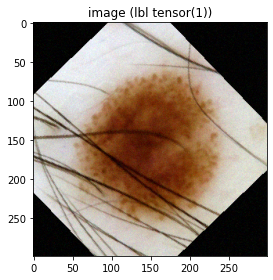

In [6]:
%matplotlib inline
sample_index = 10
train_dl.dataset.visualize(sample_index)

------------------------------------------
original
{'data.input.clinical': {'image': 'ISIC_0072650', 'age_approx': 30.0, 'anatom_site_general': 'anterior torso', 'lesion_id': 'BCN_0003356', 'sex': 'male'}}
image label = tensor(1)
augmented
{'data.input.clinical': {'image': 'ISIC_0072650', 'age_approx': 30.0, 'anatom_site_general': 'anterior torso', 'lesion_id': 'BCN_0003356', 'sex': 'male'}}
image label = tensor(1)
------------------------------------------


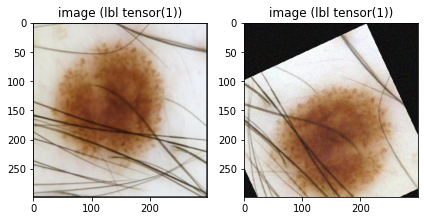

In [7]:
sample_index = 10
train_dl.dataset.visualize_augmentation(sample_index)

### Imaging Only Implementation

In [8]:
from fuse.dl.models.model_default import ModelMultiHead
from fuse.dl.models.heads.head_global_pooling_classifier import (
    HeadGlobalPoolingClassifier,
)
from fuse.dl.models.backbones.backbone_inception_resnet_v2 import (
    BackboneInceptionResnetV2,
)
from fuse.dl.models.backbones.backbone_resnet import BackboneResnet

model = ModelMultiHead(
    conv_inputs=(("data.input.image", 3),),
    backbone=BackboneInceptionResnetV2(
        input_channels_num=3, pretrained_weights_url=None
    ),
    # backbone=BackboneResnet(in_channels=3),
    heads=[
        HeadGlobalPoolingClassifier(
            head_name="head_0",
            dropout_rate=0.5,
            conv_inputs=[("model.backbone_features", 384)],
            layers_description=(256,),
            num_classes=8,
            pooling="avg",
        ),
    ],
)

# tutorial todo: change backbone and num_features to 512, add layers to the classifier head

In [9]:
from collections import OrderedDict
import torch.nn.functional as F
from fuse.dl.losses.loss_default import LossDefault
from fuse.eval.metrics.classification.metrics_classification_common import (
    MetricAUCROC,
    MetricAccuracy,
    MetricConfusion,
)
from fuse.eval.metrics.classification.metrics_thresholding_common import (
    MetricApplyThresholds,
)

# ====================================================================================
#  Loss
# ====================================================================================
losses = {
    "cls_loss": LossDefault(
        pred="model.logits.head_0",
        target="data.gt.gt_global.tensor",
        callable=F.cross_entropy,
        weight=1.0,
    )
}

# ====================================================================================
# Metrics
# ====================================================================================
class_names = ["MEL", "NV", "BCC", "AK", "BKL", "DF", "VASC", "SCC"]

metrics = OrderedDict(
    [
        ("op", MetricApplyThresholds(pred="model.output.head_0")),  # will apply argmax,
        (
            "auc",
            MetricAUCROC(
                pred="model.output.head_0",
                target="data.gt.gt_global.tensor",
                class_names=class_names,
            ),
        ),
        (
            "balanced_acc",
            MetricConfusion(
                pred="results:metrics.op.cls_pred",
                target="data.gt.gt_global.tensor",
                metrics=("sensitivity",),
                class_names=class_names,
            ),
        ),
    ]
)

best_epoch_source = {
    "source": "metrics.balanced_acc.sensitivity.macro_avg",  # can be any key from losses or metrics dictionaries
    "optimization": "max",  # can be either min/max
}

# tutorial todo: select best model according to different mertic 'metrics.auc.macro_avg'

In [11]:
import torch.optim as optim
from fuse.dl.managers.manager_default import ManagerDefault
from fuse.dl.managers.callbacks.callback_tensorboard import TensorboardCallback

# create optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=0.001)

# create scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)

# set
callbacks = {TensorboardCallback(model_dir="model_dir")}
# train from scratch
manager = ManagerDefault(output_model_dir="model_dir", force_reset=True)
# Providing the objects required for the training process.
manager.set_objects(
    net=model,
    optimizer=optimizer,
    losses=losses,
    metrics=metrics,
    best_epoch_source=best_epoch_source,
    lr_scheduler=scheduler,
    callbacks=callbacks,
    train_params={"num_epochs": 4},
    output_model_dir="model_dir",
)

# Start training
manager.train(train_dataloader=train_dl, validation_dataloader=valid_dl)

Key device not found in config parameter, setting value to default (cuda)
Key virtual_batch_size not found in config parameter, setting value to default (1)
Key gap_between_saving_epochs not found in config parameter, setting value to default (5)
Key start_saving_epochs not found in config parameter, setting value to default (80)
Key lr_sch_target not found in config parameter, setting value to default (train.losses.total_loss)
Total number of parameters in model:7,818,600, trainable parameters:7,818,600
Train Dataset Summary:
Class = <class 'fuse.data.dataset.dataset_default.DatasetDefault'>
Processors:
------------------------
{'input': {'image': <fuse_examples.tutorials.multimodality_image_clinical.input_processor.SkinInputProcessor object at 0x7f63ceb84110>, 'clinical': <fuse.data.processor.processor_csv.ProcessorCSV object at 0x7f63ef29c810>}, 'gt': {'gt_global': <fuse_examples.tutorials.multimodality_image_clinical.ground_truth_processor.SkinGroundTruthProcessor object at 0x7f63c

100%|██████████| 15/15 [00:01<00:00, 14.18it/s]


Start training on epoch 1


100%|██████████| 88/88 [00:11<00:00,  7.71it/s]


Start validation on epoch 1


100%|██████████| 15/15 [00:00<00:00, 23.19it/s]


This is the best epoch ever (metrics.balanced_acc.sensitivity.macro_avg = 0.125)
Stats for epoch: 1 (Currently the best epoch for source metrics.balanced_acc.sensitivity.macro_avg!)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                                           | Best Epoch Value                          | Current Epoch Validation                  | Current Epoch Train                       |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.cls_loss                           | 2.1042                                    | 2.1042                                    | 2.0282                                    |
-----------------------------------------------------------------------------------------------------------

100%|██████████| 88/88 [00:11<00:00,  7.86it/s]


Start validation on epoch 2


100%|██████████| 15/15 [00:00<00:00, 22.02it/s]


This is the best epoch ever (metrics.balanced_acc.sensitivity.macro_avg = 0.125)
Stats for epoch: 2 (Currently the best epoch for source metrics.balanced_acc.sensitivity.macro_avg!)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                                           | Best Epoch Value                          | Current Epoch Validation                  | Current Epoch Train                       |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.cls_loss                           | 2.1282                                    | 2.1282                                    | 1.8861                                    |
-----------------------------------------------------------------------------------------------------------

100%|██████████| 88/88 [00:11<00:00,  7.92it/s]


Start validation on epoch 3


100%|██████████| 15/15 [00:00<00:00, 23.27it/s]


This is the best epoch ever (metrics.balanced_acc.sensitivity.macro_avg = 0.2142857142857143)
Stats for epoch: 3 (Currently the best epoch for source metrics.balanced_acc.sensitivity.macro_avg!)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                                           | Best Epoch Value                          | Current Epoch Validation                  | Current Epoch Train                       |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.cls_loss                           | 2.1832                                    | 2.1832                                    | 1.7634                                    |
----------------------------------------------------------------------------------------------

In [12]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir model_dir

Reusing TensorBoard on port 6006 (pid 21569), started 32 days, 0:41:59 ago. (Use '!kill 21569' to kill it.)

### Imaging and Tabular data - concatenate tabular data after image feature extraction ###

In [ ]:
from fuse.utils.ndict import NDict
import torch
from fuse_examples.multimodality.image_clinical.dataset import (
    ANATOM_SITE_INDEX,
    SEX_INDEX,
)

### Generate Data
def post_cache_processing_clinical_encoding(sample_dict: NDict) -> dict:
    age = sample_dict["data.input.clinical.age_approx"]
    if age > 0 and age < 120:
        age = torch.tensor(age / 120.0).reshape(-1)
    else:
        age = torch.tensor(-1.0).reshape(-1)

    anatom_site = sample_dict["data.input.clinical.anatom_site_general"]
    anatom_site_one_hot = torch.zeros(len(ANATOM_SITE_INDEX))
    if anatom_site in ANATOM_SITE_INDEX:
        anatom_site_one_hot[ANATOM_SITE_INDEX[anatom_site]] = 1

    sex = sample_dict["data.input.clinical.sex"]
    sex_one_hot = torch.zeros(len(SEX_INDEX))
    if sex in SEX_INDEX:
        sex_one_hot[SEX_INDEX[sex]] = 1

    clinical_encoding = torch.cat((age, anatom_site_one_hot, sex_one_hot), dim=0)
    sample_dict["data.input.clinical.all"] = clinical_encoding

    return sample_dict


train_dl, valid_dl = isic_2019_dataset(
    size=size,
    reset_cache=False,
    post_cache_processing_func=post_cache_processing_clinical_encoding,
)

### Define model
model = ModelMultiHead(
    conv_inputs=(("data.input.image", 3),),
    backbone=BackboneInceptionResnetV2(
        input_channels_num=3, pretrained_weights_url=None
    ),
    heads=[
        HeadGlobalPoolingClassifier(
            head_name="head_0",
            dropout_rate=0.5,
            conv_inputs=[("model.backbone_features", 384)],
            tabular_data_inputs=[("data.input.clinical.all", 11)],
            layers_description=(256,),
            tabular_layers_description=(128,),
            num_classes=8,
            pooling="avg",
        ),
    ],
)


### Strart a training process
manager = ManagerDefault(output_model_dir="model_dir_late_fuse", force_reset=True)
# Providing the objects required for the training process.
manager.set_objects(
    net=model,
    optimizer=optimizer,
    losses=losses,
    metrics=metrics,
    best_epoch_source=best_epoch_source,
    lr_scheduler=scheduler,
    callbacks={},
    train_params={"num_epochs": 2},
    output_model_dir="model_dir",
)

# Start training
manager.train(train_dataloader=train_dl, validation_dataloader=valid_dl)

### Imaging and Tabular data - concatenate directly with the image

In [ ]:
### Generate Data
def post_cache_processing_clinical_pad_to_image(sample_dict: NDict) -> dict:
    sample_dict = post_cache_processing_clinical_encoding(sample_dict)
    clinical_encoding = sample_dict["data.input.clinical.all"]
    image = sample_dict["data.input.image"]

    clinical_data_spatial = clinical_encoding.reshape(
        (clinical_encoding.shape + (1, 1))
    ).repeat(
        (1,) + image.shape[1:]
    )  # repeat and reshape to [num_features, H, W]
    image = torch.cat(
        (image, clinical_data_spatial), dim=0
    )  # concat to get [num_features + 3, H, W]

    sample_dict["data.input.image"] = image

    return sample_dict


train_dl, valid_dl = isic_2019_dataset(
    size=size,
    reset_cache=False,
    post_cache_processing_func=post_cache_processing_clinical_pad_to_image,
)

### Define model
model = ModelMultiHead(
    conv_inputs=(("data.input.image", 14),),
    backbone=BackboneInceptionResnetV2(
        input_channels_num=14, pretrained_weights_url=None
    ),
    heads=[
        HeadGlobalPoolingClassifier(
            head_name="head_0",
            dropout_rate=0.5,
            conv_inputs=[("model.backbone_features", 384)],
            layers_description=(256,),
            num_classes=8,
            pooling="avg",
        ),
    ],
)


### Strart a training process
manager = ManagerDefault(output_model_dir="model_dir_early_fuse", force_reset=True)
# Providing the objects required for the training process.
manager.set_objects(
    net=model,
    optimizer=optimizer,
    losses=losses,
    metrics=metrics,
    best_epoch_source=best_epoch_source,
    lr_scheduler=scheduler,
    callbacks={},
    train_params={"num_epochs": 2},
    output_model_dir="model_dir",
)

# Start training
manager.train(train_dataloader=train_dl, validation_dataloader=valid_dl)

## Summary
### Multimodality 

There are many dierent sources of information beyond a single imaging modality that serve to inform radiologists when they are making diagnoses.
Therefore, it is important to include such information.

We saw few simple but powerful methods to integrate imaging and clinical data and how simple it is to explore when using FuseMedML.

### **Why use FuseMedML in general ?**

Successful deep learning R&D must rely on knowledge and experiments, accumulated over a wide variety of projects, and developed by different people and teams.

FuseMedML is an outstanding collaboration framework that allows you to rerun an experiment or reuse some of the capabilities originally written for different projects—all with minimal effort.

The framework’s unique software design provides many advantages, making it an ideal framework for deep-learning research and development in medical imaging:

* **Encourage sharing and collaboration** 

* **Rapid development**

* **Flexible, customizable, and scalable**

* **Standardized evaluation**

* **Medical imaging expertise** 

* **Compatibility with alternative frameworks**


<img src="fusemedml-release-plans.png" alt="drawing" width="100%"/>
